Idea de usar contornos: Rectangulos

In [1348]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import cvlib
import statistics as st

plt.style.use('dark_background') 

path = '/Users/carlosalvarado/Desktop/ComputerVision/proyecto1/fotos_placas/'
filename = path+'placa9.jpg'
im = cv.imread(filename)

assert im is not None, "file could not be read, check with os.path.exists()"

In [1349]:
def view(img, title=None):
    k = 5
    fig,ax1 = plt.subplots(figsize=(k,k))
    if len(img.shape)==2:
        ax1.imshow(img, vmin=0, vmax=255, cmap='gray')
    else:
        ax1.imshow(img)
    if title:
        plt.title(title)   
    plt.axis('off')
    plt.show()

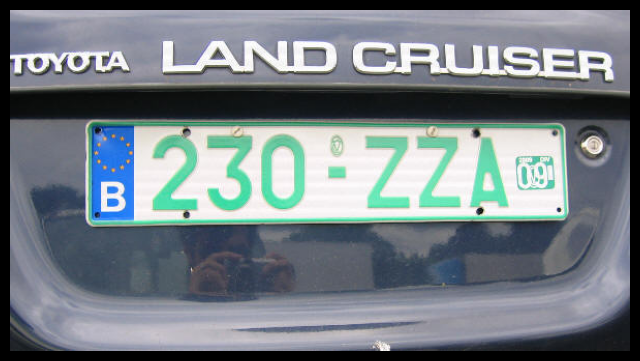

In [1350]:
# RGB -> BGR
img = cv.cvtColor(im, cv.COLOR_BGR2RGB)
cvlib.imgview(img)

In [1351]:
im = cv.imread(filename)
imgray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
print(imgray.shape)
h_img = imgray.shape[0]
w_img = imgray.shape[1]
# # floddfill
# im_floodfill = imgray.copy()
# D = 65
# cv.floodFill(im_floodfill, None, (0 ,0), 255,  loDiff=D, upDiff=D, flags=cv.FLOODFILL_FIXED_RANGE)
b = 5
#blur 
img_blur = cv.blur(imgray,(b,b))
# adaptive Th
imgbin = cv.adaptiveThreshold(img_blur, 255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV,51,5)

# compute contours
mode = cv.RETR_TREE # contour retrieval mode
method = [cv.CHAIN_APPROX_NONE, cv.CHAIN_APPROX_SIMPLE] # contour approximation method 
contours, hierarchy = cv.findContours(imgbin, mode, method[1])

(330, 600)


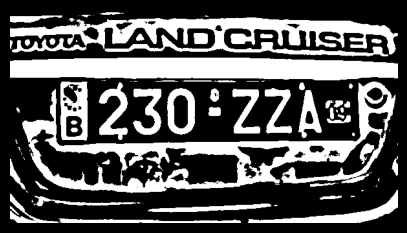

In [1352]:
view(imgbin)

In [1353]:
contorno = []
for c in contours:
    # obtner extent
    area = cv.contourArea(c)
    x,y,w,h = cv.boundingRect(c)
    rect_area = w*h
    extent = float(area)/rect_area
    if (extent > 0.6): #pongo el mínimo del área
        if (w > (h*1.35) or w >= (h*1.2)) and ((w > 100 and w < 600) and (h > 50 and h < 330)):
            print(f"el h: {h}")
            print(f"el w: {w}")
            contorno.append(c)

contorno_placa = []
count = 0
centro = [h_img/2, w_img/2]
print(centro)
for c in contorno:
    if (count == 0):
        contorno_placa.append(c)
        count = 1
    else:
        x,y,w,h = cv.boundingRect(contorno_placa[0])
        x1,y1,w1,h1 = cv.boundingRect(c)
        xr1 = centro[1] - x
        xr2 = centro[1] - x1
        if (xr1 < xr2):
            pass
        else:
            contorno_placa.pop()
            contorno_placa.append(c)
print(len(contorno_placa))

[165.0, 300.0]
0


In [1354]:
colores = {}
indexes = []
thickness = 1
#(255,0,0),602:(0,255,0)
for cnt in range(len(contorno_placa)):
    #print(f"{w}, {h}")
    colores.update({cnt:(0,255,0)})
    indexes.append(cnt)

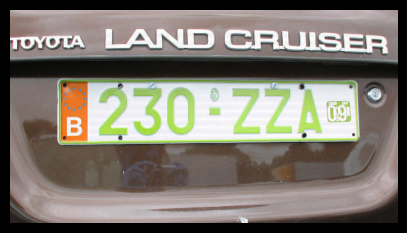

In [1355]:
r = im.copy()
# cv.rectangle(im.copy(),(x,y),(x+w,y+h),(0,255,0),1)
for c in indexes:
    x,y,w,h = cv.boundingRect(contorno_placa[c])
    r = cv.rectangle(r,(x,y),(x+w,y+h),colores[c],2)
view(r)

[684.0, 4325.0, 52.5, 262.5, 93.0, 206.0, 55.0, 178.5, 53.0, 87.0, 790.0, 149.0, 713.5, 715.0, 666.0, 160.0, 1889.0, 835.0, 1409.5, 37476.0, 141.5, 81.0, 119.0, 1924.5, 192.5, 166.5, 267.0, 3364.5, 615.0, 69.0, 419.0, 71.5, 66.0, 274.5, 250.5, 70.5, 63.5, 133.0]
684.0


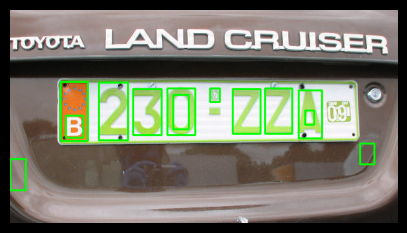

In [1356]:
if (len(contorno_placa) != 0):
    placa = im.copy()
    x,y,w,h = cv.boundingRect(contorno_placa[0])
    placa = placa[y:y+h, x:x+w]
    view(placa)
else:
    contorno = []
    areas = []

    for c in contours:
        # limitar el contorno, para tener un área más ajustada. 
        percent =0.052
        epsilon = percent*cv.arcLength(c,True)
        approx = cv.approxPolyDP(c,epsilon,True)
        if cv.contourArea(approx) > 50:
            areas.append(cv.contourArea(approx))

    moda = st.mode(areas)
    print(areas)
    print(moda)
    for c in contours:   
        # limitar el contorno, para tener un área más ajustada. 
        percent =0.052
        epsilon = percent*cv.arcLength(c,True)
        approx = cv.approxPolyDP(c,epsilon,True)
        if (cv.contourArea(approx)>130): #pongo el mínimo del área
            area = cv.contourArea(c)
            x,y,w,h = cv.boundingRect(c)
            if (w > (h*1.35) or w >= (h*1.2)):
                pass
            else:
                if (h > (w*1.35) or h >= (w*1.2)):
                    contorno.append(c)

    colores = {}
    indexes = []
    thickness = 1
    #(255,0,0),602:(0,255,0)
    for cnt in range(len(contorno)):
        #print(f"{w}, {h}")
        colores.update({cnt:(0,255,0)})
        indexes.append(cnt)

    r = im.copy()
    # cv.rectangle(im.copy(),(x,y),(x+w,y+h),(0,255,0),1)
    for c in indexes:
        x,y,w,h = cv.boundingRect(contorno[c])
        r = cv.rectangle(r,(x,y),(x+w,y+h),colores[c],2)
    view(r)

In [1357]:

if (len(contorno_placa) != 0):
    imgray = cv.cvtColor(placa, cv.COLOR_BGR2GRAY)
    print(imgray.shape)
    h_img = imgray.shape[0]
    w_img = imgray.shape[1]
    centro = [int(h_img/2), int(w_img/2)]
    print(centro[0])
    print(centro[1])
    # floddfill
    im_floodfill = imgray.copy()
    D = 65
    cv.floodFill(im_floodfill, None, (centro[1] ,centro[0]), 255,  loDiff=D, upDiff=D, flags=cv.FLOODFILL_FIXED_RANGE)
    # b = 5
    # #blur 
    # img_blur = cv.blur(imgray,(b,b))
    # adaptive Th
    imgbin = cv.adaptiveThreshold(im_floodfill, 255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV,51,5)

    # compute contours
    mode = cv.RETR_TREE # contour retrieval mode
    method = [cv.CHAIN_APPROX_NONE, cv.CHAIN_APPROX_SIMPLE] # contour approximation method 
    contours, hierarchy = cv.findContours(imgbin, mode, method[1])

    view(imgbin)

In [1358]:
if (len(contorno_placa) != 0):
    contorno = []
    areas = []

    for c in contours:
        # limitar el contorno, para tener un área más ajustada. 
        percent =0.052
        epsilon = percent*cv.arcLength(c,True)
        approx = cv.approxPolyDP(c,epsilon,True)
        if cv.contourArea(approx) > 50:
            areas.append(cv.contourArea(approx))

    moda = st.mode(areas)
    print(areas)
    print(moda)
    for c in contours:   
        # limitar el contorno, para tener un área más ajustada. 
        percent =0.052
        epsilon = percent*cv.arcLength(c,True)
        approx = cv.approxPolyDP(c,epsilon,True)
        if (cv.contourArea(approx)>130): #pongo el mínimo del área
            area = cv.contourArea(c)
            x,y,w,h = cv.boundingRect(c)
            if (w > (h*1.35) or w >= (h*1.2)):
                pass
            else:
                if (h > (w*1.35) or h >= (w*1.2)):
                    contorno.append(c)

    colores = {}
    indexes = []
    thickness = 1
    #(255,0,0),602:(0,255,0)
    for cnt in range(len(contorno)):
        #print(f"{w}, {h}")
        colores.update({cnt:(0,255,0)})
        indexes.append(cnt)

    r = placa.copy()
    # cv.rectangle(im.copy(),(x,y),(x+w,y+h),(0,255,0),1)
    for c in indexes:
        x,y,w,h = cv.boundingRect(contorno[c])
        r = cv.rectangle(r,(x,y),(x+w,y+h),colores[c],2)
    view(r)